https://docs.google.com/presentation/d/1s77-3TWJfTUZXn1XGAFydcRGaVvstaOXj01UnN-l4D0/edit?slide=id.g24c5fdd6318_0_0#slide=id.g24c5fdd6318_0_0

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


#Read dataset

In [ ]:
# https://drive.google.com/file/d/1e2Yx2lBGdQqNWlRZidN4caULvGvS_NBS/view?usp=drive_link
url = f'https://drive.google.com/uc?id=1e2Yx2lBGdQqNWlRZidN4caULvGvS_NBS'
df = pd.read_csv(url)

**Following is the Data Dictionary for Credit Card dataset:**

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#Preprocessing

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()/len(df)*100

,0
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.isnull().sum()/len(df)*100

<ipython-input-45-b2f10471caf0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
<ipython-input-45-b2f10471caf0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,0
CUST_ID,0.0
BALANCE,0.0
BALANCE_FREQUENCY,0.0
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,0.0
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0


In [ ]:
#remove CUST_ID
df.drop('CUST_ID', axis=1, inplace=True)

#Scaling

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#K-Means

##Choose the best K

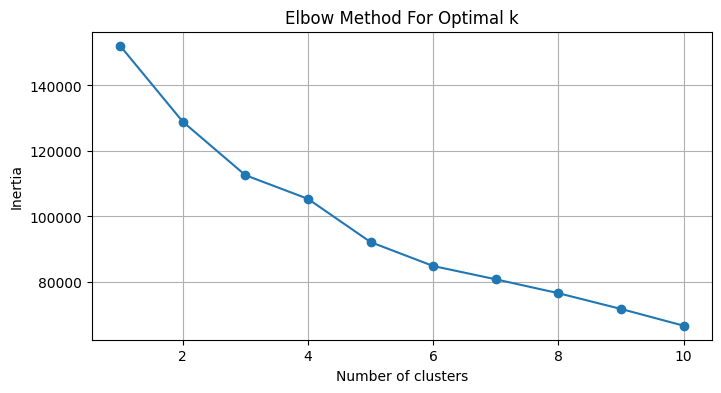

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Vẽ Elbow Chart
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

=> choose K = 4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,5023.958508,0.967107,721.184928,453.485000,267.804742,5075.737329,0.329511,0.161791,0.220253,0.510058,15.831959,10.420619,8215.313964,4176.805950,2227.858327,0.040022,11.414433
1,109.464707,0.412883,351.589913,191.487250,160.571811,299.684391,0.320703,0.072810,0.235009,0.035164,0.732394,4.812877,3628.936958,1036.107793,252.929103,0.253098,11.216633
2,1253.422099,0.974766,2181.418772,1241.370362,940.311888,234.489319,0.928436,0.390092,0.748134,0.041704,0.807310,32.718820,5120.665715,2147.982881,784.272825,0.282880,11.727477
3,1500.348531,0.966640,282.216074,209.226223,73.305481,789.088912,0.206247,0.097865,0.108084,0.157946,3.000000,3.655490,3226.815035,954.225631,816.131081,0.022924,11.485460


from matplotlib import pyplot as plt
cluster_profile['BALANCE'].plot(kind='hist', bins=20, title='BALANCE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['BALANCE_FREQUENCY'].plot(kind='hist', bins=20, title='BALANCE_FREQUENCY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['PURCHASES'].plot(kind='hist', bins=20, title='PURCHASES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['ONEOFF_PURCHASES'].plot(kind='hist', bins=20, title='ONEOFF_PURCHASES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='BALANCE', y='BALANCE_FREQUENCY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='BALANCE_FREQUENCY', y='PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='PURCHASES', y='ONEOFF_PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['BALANCE'].plot(kind='line', figsize=(8, 4), title='BALANCE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['BALANCE_FREQUENCY'].plot(kind='line', figsize=(8, 4), title='BALANCE_FREQUENCY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['PURCHASES'].plot(kind='line', figsize=(8, 4), title='PURCHASES')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['ONEOFF_PURCHASES'].plot(kind='line', figsize=(8, 4), title='ONEOFF_PURCHASES')
plt.gca().spines[['top', 'right']].set_visible(False)

**Cluster 0 – Cash-Heavy Users**
BALANCE: cao (~5024)

CASH_ADVANCE: rất cao (~5076) → sử dụng rút tiền mặt nhiều

PURCHASES: thấp (~721)

CASH_ADVANCE_FREQUENCY: cao (~0.51)

PURCHASES_FREQUENCY: thấp (~0.33)

PRC_FULL_PAYMENT: rất thấp (~0.04) → ít khi trả hết nợ

=> Đây là nhóm có xu hướng rút tiền mặt nhiều, chi tiêu thấp, và không trả nợ đầy đủ → rủi ro tín dụng cao.

=> "Cash-Dependent Risk Users"


**Cluster 1 – Inactive Low-Balance Users**
BALANCE: rất thấp (~109)

PURCHASES và CASH_ADVANCE: thấp

PURCHASES_TRX: thấp (~4.8)

CASH_ADVANCE_TRX: gần như không có (~0.7)

PRC_FULL_PAYMENT: khá cao (~0.25)

=> Rất ít giao dịch, số dư thấp, ít rút tiền mặt, nhưng lại có tỷ lệ thanh toán tốt → đây là người dùng thụ động, rủi ro thấp.

=> "Dormant but Disciplined"

**Cluster 2 – Heavy Spenders with High Activity**
PURCHASES: cao nhất (~2181)

PURCHASES_TRX: rất cao (~32.7)

PURCHASES_FREQUENCY: rất cao (~0.93)

CASH_ADVANCE: thấp

PRC_FULL_PAYMENT: cao nhất (~0.28)

=> Hoạt động mua hàng mạnh, thường xuyên, sử dụng trả góp nhiều, và thanh toán tốt → nhóm khách hàng giá trị cao và trung thành.

=> "Engaged High-Value Shoppers"

**Cluster 3 – Low-Activity Moderate Users**
PURCHASES và CASH_ADVANCE: thấp đến trung bình

Tần suất mua sắm: thấp (~0.2)

PRC_FULL_PAYMENT: rất thấp (~0.02)

=> Nhóm này có hoạt động yếu, thanh toán không đầy đủ, có thể là nhóm khách mới hoặc ít sử dụng.

=> "Low Engagement, Low Payment"

#Hierarchical

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


In [ ]:
# 1. Tiền xử lý dữ liệu (giả định đã có df)
X = df.drop(columns=['Cluster'], errors='ignore')  # Loại bỏ nhãn KMeans
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# 2. Chuẩn hóa
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
# 3. Tính khoảng cách & phân cấp
linked = linkage(X_scaled, method='ward')
linked

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78910000e+04, 1.78950000e+04, 1.51184679e+02, 3.41800000e+03],
       [1.78900000e+04, 1.78940000e+04, 1.59720612e+02, 5.53200000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.04442635e+02, 8.95000000e+03]])

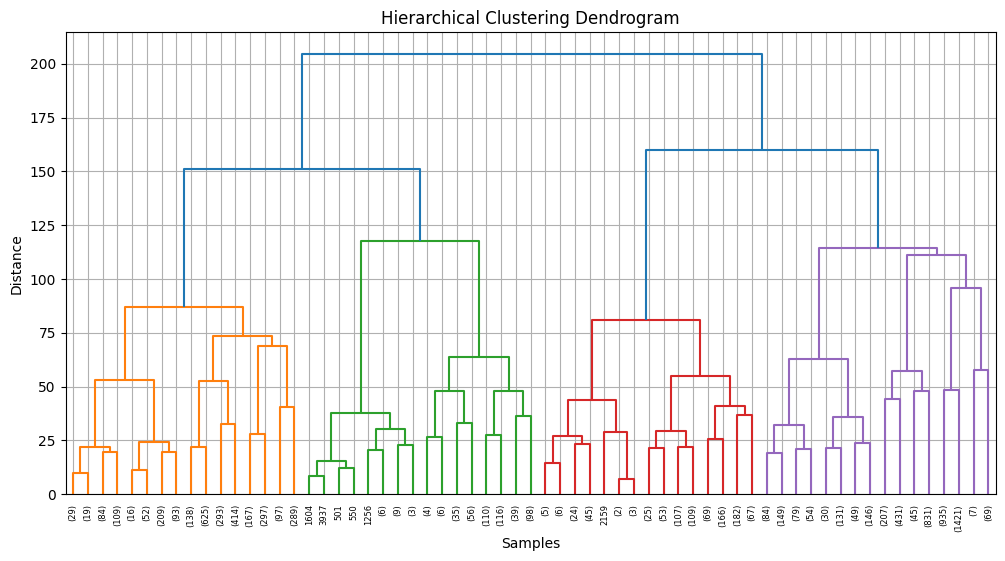

In [ ]:
# 4. Vẽ dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

=> 4 clusters

In [ ]:
# 5. Áp dụng phân cụm với 4 cụm
num_clusters = 4
df['HCluster'] = fcluster(linked, num_clusters, criterion='maxclust')
df

In [ ]:
# 6. Xem trung bình theo cụm
cluster_profile = df.groupby('HCluster').mean()
cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
HCluster,,,,,,,,,,,,,,,,,,
1,1115.777861,0.975988,1329.751709,680.440699,649.478386,422.112009,0.868399,0.338744,0.669564,0.077173,1.842033,23.312863,4441.124655,1532.519529,632.798004,0.236684,11.958376,2.046401
2,3261.592964,0.987867,6703.434969,4494.806448,2209.860554,428.807993,0.944802,0.751209,0.766363,0.054552,1.156057,80.305955,9125.770021,6224.082423,1486.107858,0.266065,11.948665,1.930185
3,4733.393046,0.981978,389.403808,264.281863,125.239618,4742.439786,0.204784,0.100882,0.119632,0.495628,15.153935,4.723380,7716.724537,3674.262245,1658.389287,0.031881,11.791667,0.716435
4,1082.617273,0.784368,317.087249,190.795311,126.612072,689.243507,0.258421,0.078436,0.176230,0.113230,2.146958,4.312982,3448.347519,1031.305059,797.629549,0.112448,11.144602,2.202656


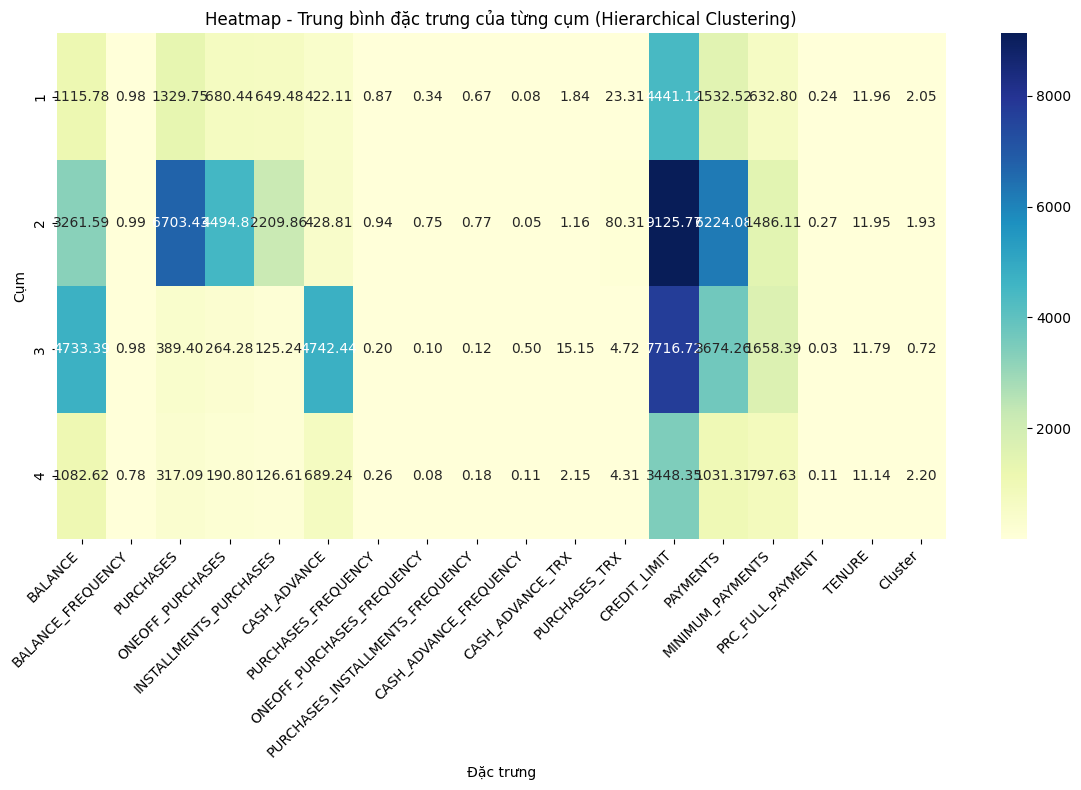

In [ ]:
# 7. Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap - Trung bình đặc trưng của từng cụm (Hierarchical Clustering)')
plt.ylabel('Cụm')
plt.xlabel('Đặc trưng')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🔹 Cụm 1 (Cluster 1 – nhãn HCluster = 1)

Chi tiêu trung bình: ~1,330

Tần suất giao dịch: cao (0.87)

Cân bằng giữa one-off và installments

Rút tiền mặt rất thấp

Thanh toán tốt (PRC_FULL_PAYMENT = 0.24)

✅ Đây là nhóm khách hàng thường xuyên sử dụng thẻ để mua hàng, có hành vi chi tiêu ổn định và khả năng thanh toán khá.
→ Khách hàng trung thành, nên duy trì.

🔹 Cụm 2 (Cluster 2 – HCluster = 2)

Chi tiêu cực cao (6,700), đặc biệt là ONEOFF_PURCHASES (4,495)

Tần suất sử dụng gần như tuyệt đối (0.94–0.77)

Tỷ lệ thanh toán đầy đủ cao nhất (0.27)

Hạn mức tín dụng rất cao (~9,125)

✅ Nhóm khách hàng VIP, chi tiêu mạnh, thanh toán tốt, dùng thẻ cho các giao dịch lớn.
→ Cần ưu tiên dịch vụ cao cấp, giữ chân lâu dài.

🔹 Cụm 3 (Cluster 3 – HCluster = 3)

Rút tiền mặt rất cao (~4,742)

Chi tiêu mua sắm rất thấp (~389)

Tần suất mua hàng thấp (0.20)

Tỷ lệ trả đủ rất thấp (0.03)

⚠️ Đây là nhóm nguy cơ tín dụng cao, chủ yếu dùng thẻ để rút tiền mặt, không mua hàng nhiều, trả chậm.
→ Nên kiểm soát tín dụng, hạn chế nâng hạn mức.

🔹 Cụm 4 (Cluster 4 – HCluster = 4)

Tất cả chỉ số ở mức thấp: chi tiêu, tần suất, hạn mức, thanh toán

Tần suất cập nhật số dư thấp nhất (0.78)

Có dấu hiệu mới tham gia hoặc ít hoạt động

📌 Nhóm khách hàng thụ động hoặc mới – chưa khai thác tiềm năng.
→ Cần chiến dịch tiếp cận, khuyến khích sử dụng.



#PCA

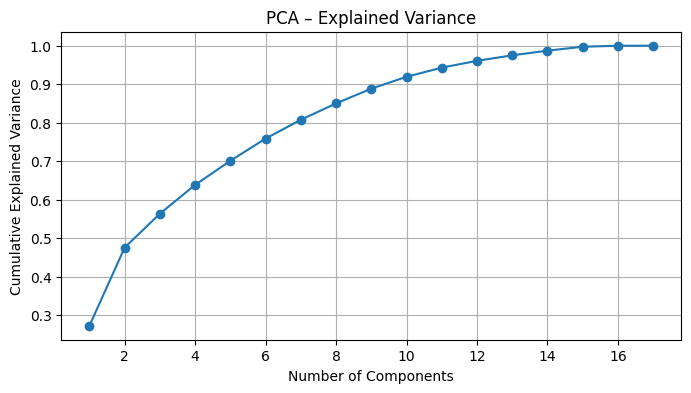

In [ ]:
# PCA không giảm ngay, chỉ để phân tích
pca = PCA()
pca.fit(scaled_data)

# Tính tỷ lệ phương sai tích lũy
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Explained Variance')
plt.grid(True)
plt.show()

##PCA 2D

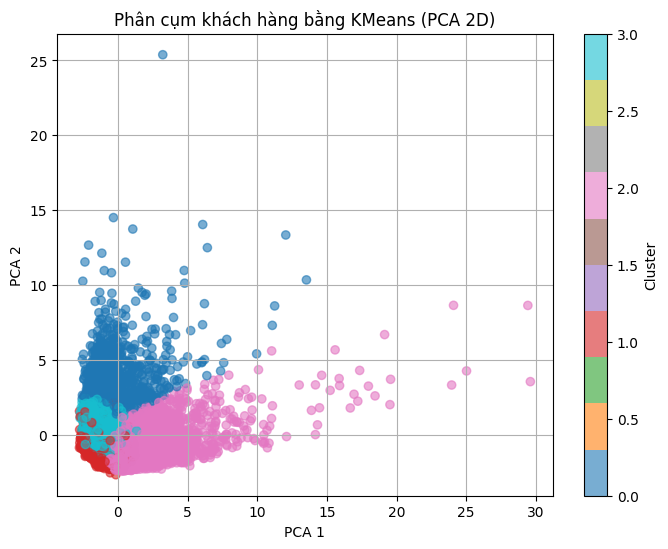

In [ ]:
# Giảm về 2 thành phần chính
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.title('Phân cụm khách hàng bằng KMeans (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# PCA 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(scaled_data)

# Ma trận các thành phần chính (components)
pca_2d_components = pd.DataFrame(pca_2d.components_, columns=df.columns[:-1])  # Loại bỏ cột Cluster nếu đã thêm
pca_2d_components.index = ['PCA1', 'PCA2']
print("PCA 2D Components:")
pca_2d_components

PCA 2D Components:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PCA1,0.101077,0.120043,0.411642,0.346407,0.336814,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390695,0.211663,0.266249,0.060351,0.132112,0.081021
PCA2,0.403957,0.130537,0.041038,0.062872,-0.018533,0.439242,-0.190780,-0.017924,-0.178601,0.434082,0.419734,-0.019394,0.238678,0.257476,0.166970,-0.190026,-0.004326


🔹 PCA1 – Liên quan đến hoạt động mua sắm

Các đặc trưng có trọng số cao:

PURCHASES: 0.412

PURCHASES_TRX: 0.391

ONEOFF_PURCHASES: 0.346

INSTALLMENTS_PURCHASES: 0.337

PURCHASES_FREQUENCY: 0.321

✅ Giải thích: PCA1 có vẻ đại diện cho hành vi tiêu dùng chung của khách hàng – đặc biệt là các khoản mua sắm (one-off + installments) và tần suất giao dịch.

🔹 PCA2 – Liên quan đến việc rút tiền mặt

Các đặc trưng có trọng số cao:

CASH_ADVANCE: 0.439

CASH_ADVANCE_FREQUENCY: 0.434

CASH_ADVANCE_TRX: 0.420

BALANCE: 0.404

✅ Giải thích: PCA2 phản ánh hành vi rút tiền mặt, bao gồm số dư và tần suất giao dịch liên quan đến cash advance.

🔸 Đặc điểm nổi bật khác:

CREDIT_LIMIT, PAYMENTS, và MINIMUM_PAYMENTS đóng góp ở cả PCA1 và PCA2, nhưng ở mức trung bình → có vai trò nền.

PRC_FULL_PAYMENT có hệ số dương với PCA1 nhưng âm với PCA2 → những người chi tiêu cao (PCA1) thường có khả năng thanh toán đầy đủ, trong khi người rút tiền mặt thường không thanh toán đầy đủ.

##PCA 3D

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# PCA 3 thành phần
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(scaled_data)

# KMeans phân cụm
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Tạo DataFrame để vẽ
plot_df = pd.DataFrame(pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
plot_df['Cluster'] = clusters

# Vẽ biểu đồ 3D
fig = px.scatter_3d(plot_df, x='PCA1', y='PCA2', z='PCA3',
                    color=plot_df['Cluster'].astype(str),
                    title='Phân cụm khách hàng (PCA 3D - KMeans)',
                    labels={'color': 'Cluster'},
                    opacity=0.7)
fig.show()

In [ ]:
# PCA 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(scaled_data)

# Ma trận các thành phần chính (components)
pca_3d_components = pd.DataFrame(pca_3d.components_, columns=df.columns[:-1])  # Loại bỏ cột Cluster nếu đã thêm
pca_3d_components.index = ['PCA1', 'PCA2', 'PCA3']
print("PCA 3D Components:")
pca_3d_components

PCA 3D Components:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PCA1,0.101077,0.120043,0.411642,0.346407,0.336814,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390695,0.211663,0.266249,0.060351,0.132112,0.081021
PCA2,0.403957,0.130537,0.041038,0.062872,-0.018533,0.439242,-0.190780,-0.017924,-0.178601,0.434082,0.419734,-0.019394,0.238678,0.257476,0.166970,-0.190026,-0.004326
PCA3,0.160075,0.420630,-0.257903,-0.392115,0.110488,0.027345,0.374691,-0.115131,0.473409,0.109072,0.115541,0.077331,-0.100483,-0.276237,0.221635,-0.124774,0.064326


🔹 PCA1 – Hành vi mua sắm

Các đặc trưng nổi bật (hệ số lớn nhất):

PURCHASES: 0.4116

PURCHASES_TRX: 0.3907

ONEOFF_PURCHASES: 0.3464

INSTALLMENTS_PURCHASES: 0.3368

PURCHASES_FREQUENCY: 0.3215

📌 Ý nghĩa: PCA1 đại diện cho hoạt động mua sắm – cả về tổng giá trị và tần suất. Khách hàng có điểm cao theo PCA1 là người thường xuyên chi tiêu bằng thẻ tín dụng.

🔹 PCA2 – Rút tiền mặt và nợ

Các đặc trưng nổi bật:

CASH_ADVANCE: 0.4392

CASH_ADVANCE_FREQUENCY: 0.4341

CASH_ADVANCE_TRX: 0.4197

BALANCE: 0.4040

CREDIT_LIMIT: 0.2387

📌 Ý nghĩa: PCA2 phản ánh thói quen rút tiền mặt và mức nợ tồn đọng. Những người có điểm PCA2 cao có xu hướng rút tiền từ thẻ tín dụng thay vì chỉ dùng để mua hàng.

🔹 PCA3 – Mức độ thanh toán đều đặn & chi tiết hành vi

Các đặc trưng nổi bật:

PURCHASES_INSTALLMENTS_FREQUENCY: 0.4734

BALANCE_FREQUENCY: 0.4206

PURCHASES_FREQUENCY: 0.3747

MINIMUM_PAYMENTS: 0.2216

INSTALLMENTS_PURCHASES: 0.1105

Đặc trưng tiêu cực:

ONEOFF_PURCHASES: -0.3921

PAYMENTS: -0.2762

📌 Ý nghĩa: PCA3 dường như phản ánh mức độ đều đặn và hình thức thanh toán:

Người có điểm cao ở PCA3 thường trả tiền theo kỳ hạn (installments), thanh toán tối thiểu, và mua hàng theo chu kỳ.

Người có điểm thấp có xu hướng mua một lần nhiều và thanh toán toàn bộ.

#Comparision

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

In [ ]:
# Dữ liệu đã chuẩn hóa: X_scaled

### 1. KMeans clustering
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score - KMeans: {kmeans_score:.4f}")

### 2. Hierarchical clustering (Ward method)
linked = linkage(X_scaled, method='ward')
hclust_labels = fcluster(linked, 4, criterion='maxclust')

hclust_score = silhouette_score(X_scaled, hclust_labels)
print(f"Silhouette Score - Hierarchical: {hclust_score:.4f}")

Silhouette Score - KMeans: 0.1664
Silhouette Score - Hierarchical: 0.1547
